In [43]:
import csv
import numpy as np
import matplotlib.pyplot as plot
import re
import networkx as nx

In [20]:
# Getting location information 
readerLocations = csv.reader(open("locations.csv", "r"), delimiter=",")
locationList = list(readerLocations)
locations = np.array(locationList).astype("float")
nLocations = len(locations)

# Getting distance information
readerDistances = csv.reader(open("distances.csv", "r"), delimiter=",")
distanceList = list(readerDistances)
distances = np.array(distanceList).astype("float")

# Getting flow information
readerFlows = csv.reader(open("flows.csv", "r"), delimiter=",")
flowList = list(readerFlows)
flows = np.array(flowList).astype("float")

In [25]:
# Getting optimal solution information
with open('bestOutcomes.txt', 'r') as file:
    pairingText = file.readlines()

pairings = np.empty((nLocations, 2))
for i in range(len(pairingText)):
    # First column is facilities, second is locations
    pairNums = re.findall('\d+',pairingText[i])
    pairings[i] = pairNums


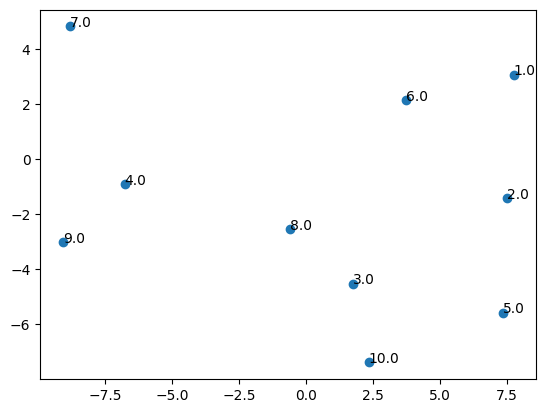

In [41]:
# Plotting network
x = locations[:,0]
y = locations[:,1]
plot.scatter(x, y)

labels = pairings[:,0]

for i in range(len(x)):
    label = str(labels[i])
    plot.annotate(label, (x[i], y[i]))

plot.show()

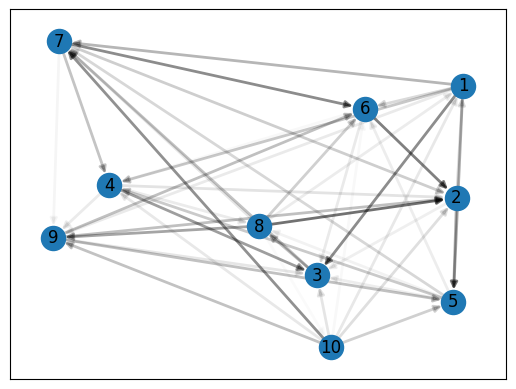

In [108]:
# Defining graph nodes
facilityG = nx.DiGraph()
pos = {}
labels = {}
#facilityG.add_nodes_from(range(1,len(locations)+1))
for i in range(len(pairings)):
    pos[pairings[i,0]] = (x[i],y[i])
    labels[pairings[i,0]] = str(int(pairings[i,0]))

# Generating edge array
rawEdges = []
edgeColors = []
edgeAlphas = []
for i in range(1,nLocations+1):
    for j in range(1,nLocations+1):
        possibleEdge = (i,j)
        if i != j and flows[i-1,j-1] > 0:
            rawEdges.append(possibleEdge)
            edgeColors.append(flows[i-1,j-1])
            edgeAlphas.append(flows[i-1,j-1]/8)

# Defining graph edges
facilityG.add_edges_from(rawEdges)
cmap = plot.cm.plasma

# Drawing the graph
#nodes = nx.draw_networkx_nodes(facilityG, pos, with_labels=True, node_color='white', edge_color=edgeColors, edge_cmap = cmap, arrows=True)
nodes = nx.draw_networkx_nodes(facilityG, pos,nodelist=range(1,len(locations)+1))#,node_color='white')
#edges = nx.draw_networkx_edges(facilityG,pos,edge_color=edgeColors,edge_cmap=cmap,width = 2,arrows=True)
edges = nx.draw_networkx_edges(facilityG,pos,width = 2,arrows=True)
facilityLabels = nx.draw_networkx_labels(facilityG,pos,labels)

# set alpha value for each edge
for i in range(len(edgeAlphas)):
    edges[i].set_alpha(edgeAlphas[i])

for i in range(len(pairings)):
    nodes.label = str(pairings[i,0])

plot.show()